In [1]:
import os
import glob
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.fftpack as fftpack

import pywt


import cv2

%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

In [2]:
os.getcwd()

'/home/ps101/projekte/entropie'

In [32]:
img_array = cv2.imread(glob.glob(f'{os.getcwd()}/test_data/input/seq1/00001.jpg')[0])
img_array = img_array[...,::-1] # for correct color

img_array_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

In [33]:
img_array.shape, img_array_gray.shape

((480, 640, 3), (480, 640))

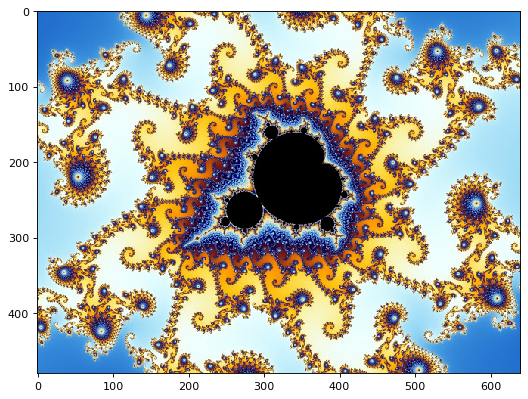

In [34]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(img_array, interpolation='nearest')

fig.savefig('original.png', dpi=300)

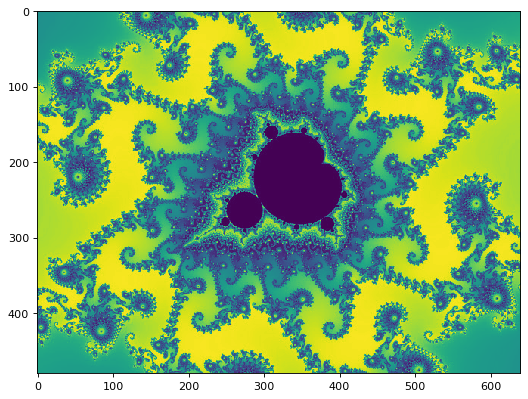

In [35]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(img_array_gray, interpolation='nearest')

fig.savefig('grayscale.png', dpi=300)

In [65]:
titles = ['Approximation', ' Horizontal detail', 'Vertical detail', 'Diagonal detail']
coeffs_color = pywt.dwt2(img_array, 'bior1.3')
coeffs_gray = pywt.dwt2(img_array_gray, 'bior1.3')
#LL, (LH, HL, HH) = coeffs2

LL_color, (LH_color, HL_color, HH_color) = coeffs_color
LL_gray, (LH_gray, HL_gray, HH_gray) = coeffs_gray

LL_color.shape, LL_gray.shape

((480, 322, 4), (242, 322))

In [66]:
#HH_color = abs(HH_color)
#HH_gray = abs(HH_gray)

HH_gray.shape

(242, 322)

In [100]:
HH_gray

array([[ 0. ,  0. ,  0. , ...,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

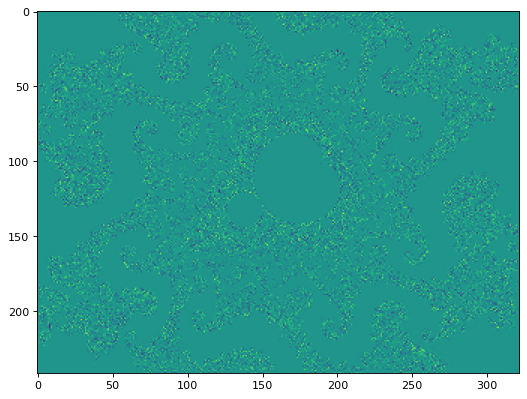

In [99]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(HH_gray)

fig.savefig('wavelet.png', dpi=300)

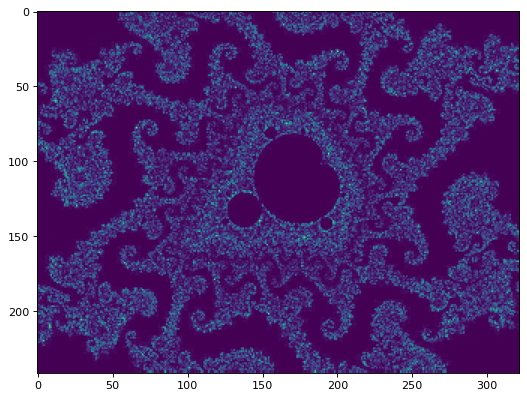

In [98]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(abs(HH_gray))

fig.savefig('wavelet.png', dpi=300)

In [68]:
# create small window 
window_size = (6,8) #(240,320) / (6,8) = (40,40)

In [75]:
x_step = 3
y_step = 4

idx_x = 0
idx_y = 0

# create a heatmap
#heatmap = np.array(shape=())

patchies = []

while(True):
    # when the bottem end is reached, start from the top with a y-step.  
    if idx_x + window_size[0] > HH_gray.shape[0]:
        idx_x = 0
        idx_y += y_step

        if (idx_y + window_size[1] > HH_gray.shape[1]):                 
            print(f'finished after {len(patchies)} patchies')
            break
            
    #print(f'{idx_x}:{idx_x + window_size[0]},{idx_y}:{idx_y + window_size[1]}')
    #print(f'idx_x: {idx_x})
    #print(f'idx_y: {idx_y})
    data = HH_gray[idx_x: idx_x + window_size[0], idx_y: idx_y + window_size[1]]
    patchies.append(data)
    
    idx_x += x_step   
    rows += 1

finished after 6241 patchies


In [76]:
size_x = int(1 / x_step * (HH_gray.shape[0] - window_size[0]) + 1)
size_y = int(1 / y_step * (HH_gray.shape[1] - window_size[1]) + 1)

size_x, size_y

(79, 79)

In [81]:
heatmap = np.ones(len(patchies))
for i in range(heatmap.shape[0]):
    heatmap[i] = patchies[i].mean()
    #print(f'mean: {patchies[i].mean()}, heatmap: {heatmap[i]}')
    
heatmap = np.abs(heatmap).reshape(size_x, size_y).T

In [82]:
heatmap.shape

(79, 79)

In [83]:
heatmap[:10]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.04166667e-02, 1.04166667e-02, 1.04166667e-02, 2.08333333e-02,
        2.10479782e-16, 0.00000000e+00, 2.10479782e-16, 0.00000000e+00,
        3.12500000e-01, 1.36458333e+00, 1.05208333e+00, 2.85416667e+00,
        2.85416667e+00, 3.56250000e+00, 1.57291667e+00, 1.67708333e+00,
        7.08333333e-01, 2.84375000e+00, 1.55208333e+00, 7.29166667e-01,
        4.47916667e-01, 1.97916667e-01, 1.59375000e+00, 2.73958333e+00,
        8.02083333e-01, 1.02083333e+00, 8.75000000e-01, 1.43750000e+00,
        5.09375000e+00, 2.95833333e+00, 2.16666667e+00, 8.95833333e-01,
        6.25000000e-02, 1.04166667e-02, 6.56250000e-01, 3.52083333e+00,
        3.48958333e+00, 2.26041667e+00, 2.45833333e+00, 9.27083333e-01,
        1.21875000e+00, 1.04166667e+00, 1.65625000e+00, 4.82291667e+00,
        4.68750000e+00, 1.64583333e+00, 8.12500000e-01, 2.45833333e+00,
        2.95833333e+00, 2.18750000e-01, 2.31250000e+00, 4.583333

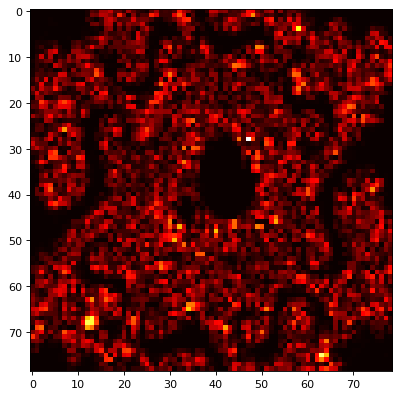

In [84]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(heatmap, cmap=plt.cm.hot)

fig.savefig('patchies.png', dpi=300)

In [85]:
# compute center of highest mean
np.unravel_index(heatmap.argmax(), heatmap.shape)

(28, 47)

In [86]:
mask = np.ones_like(heatmap)
mask[43,49] = 0

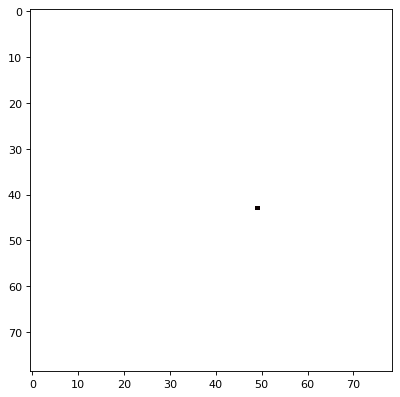

In [87]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(mask, cmap=plt.cm.hot)

In [88]:
width = 640
height = 480
heatmap_resized = np.abs(cv2.resize(heatmap, (width, height), interpolation=cv2.INTER_CUBIC))
heatmap_resized = heatmap_resized.astype(np.uint8)
heatmap_resized.shape, np.max(heatmap_resized)

((480, 640), 12)

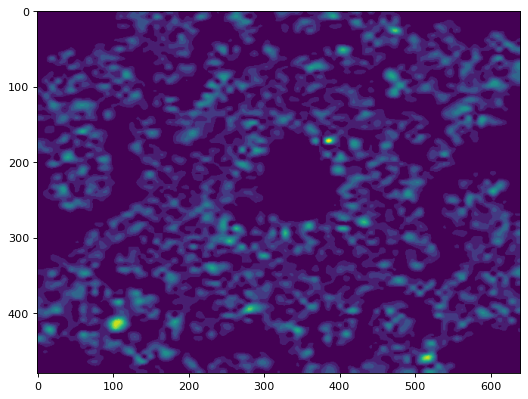

In [89]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(heatmap_resized)

In [90]:
heatmap_resized.dtype, heatmap_resized.shape

(dtype('uint8'), (480, 640))

In [91]:
cmap = plt.get_cmap('jet')


heatmap_rescaled = np.interp(heatmap_resized, (heatmap_resized.min(), heatmap_resized.max()), (0, 255)).astype(np.uint8)

rgba_img = cmap(heatmap_rescaled)[:,:,:3]
rgba_img = rgba_img * 255.
rgba_img = rgba_img.astype(np.uint8)
rgba_img.dtype, rgba_img.shape

(dtype('uint8'), (480, 640, 3))

In [92]:
coords = np.unravel_index(heatmap_resized.argmax(), heatmap_resized.shape)
coords

(171, 385)

dim 0: 35.625, dim 1: 60.15625


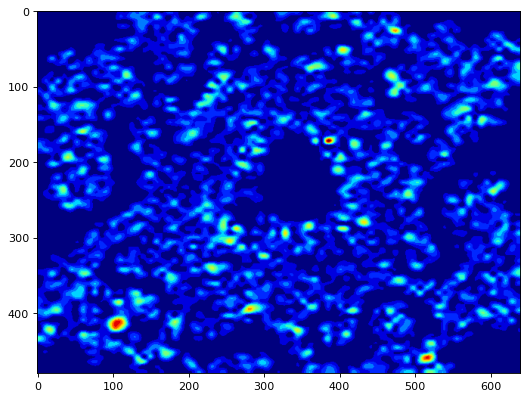

In [93]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(rgba_img)

max_indices = np.unravel_index(heatmap_resized.argmax(), heatmap_resized.shape)
print(f'dim 0: {100. / heatmap_resized.shape[0] * max_indices[0]}, dim 1: {100. / heatmap_resized.shape[1] * max_indices[1]}')
100./480*301, 100./640*354

fig.savefig('patchies_rgb.png', dpi=300)

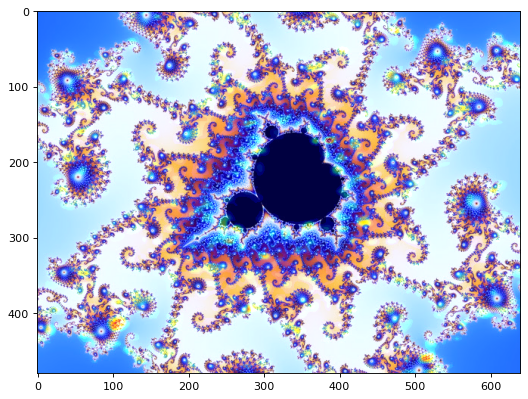

In [95]:
overlayed_array = cv2.addWeighted(rgba_img, 0.5, img_array, 1, 0)

fig = plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(overlayed_array)

fig.savefig('overlayed.png', dpi=300)

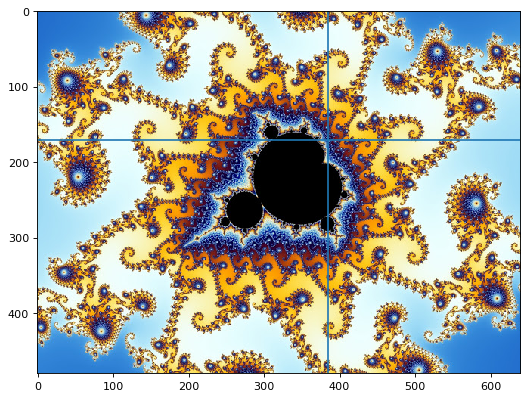

In [97]:
fig = plt.figure(figsize=(8, 6), dpi=80)

plt.imshow(img_array, interpolation='nearest')
plt.axhline(y=coords[0])
plt.axvline(x=coords[1])

fig.savefig('original.png', dpi=300)